In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [2]:
signalsjson = "E:/das/2021-11-30_Medidas/signals1.json"
#load json
with open(signalsjson) as f:
    data = json.load(f)
#foreach row get signal as 2d array
signals = []
vids = []
for row in data:
    signal = np.array(row['Signal'])
    vid = row['VehicleID']
    if signal.shape[0] != 120:
        continue
    vids.append(vid)
    signals.append(signal)

shapes = {arr.shape for arr in signals}
signals = np.stack(signals)


In [3]:
#apply phate clustering
import phate
phate_operator = phate.PHATE()
phate_operator.set_params(n_components=2)

#apply phate to signals
phate_signals = phate_operator.fit_transform(signals)



Calculating PHATE...
  Running PHATE on 8128 observations and 120 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.19 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.84 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 3.07 seconds.
  Calculating landmark operator...
    Calculating SVD...


d:\proyectos\das\.venv\lib\site-packages\graphtools\graphs.py:283: RuntimeWarning: Detected zero distance between samples 6637 and 7432. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 0.49 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.33 seconds.
  Calculated landmark operator in 3.49 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 3.51 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.42 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.95 seconds.
Calculated PHATE in 13.45 seconds.


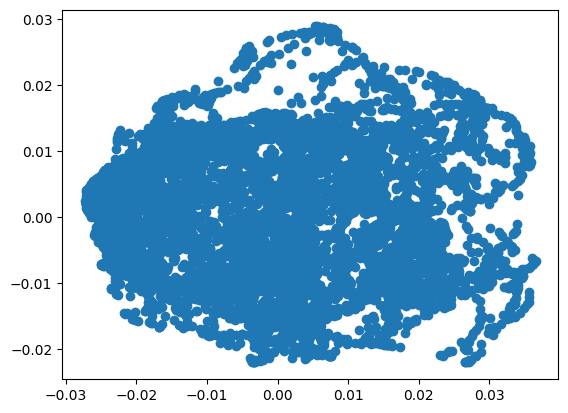

In [4]:
#plot phate results
plt.scatter(phate_signals[:,0], phate_signals[:,1])
plt.show()


Calculating PHATE...
  Running PHATE on 8128 observations and 120 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.21 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.89 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 3.15 seconds.
  Calculating landmark operator...
    Calculating SVD...


d:\proyectos\das\.venv\lib\site-packages\graphtools\graphs.py:283: RuntimeWarning: Detected zero distance between samples 6637 and 7432. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 0.43 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.24 seconds.
  Calculated landmark operator in 3.34 seconds.
  Calculating optimal t...
    Automatically selected t = 41
  Calculated optimal t in 3.46 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.39 seconds.
  Calculating metric MDS...


d:\proyectos\das\.venv\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 15.94 seconds.
Calculated PHATE in 26.29 seconds.


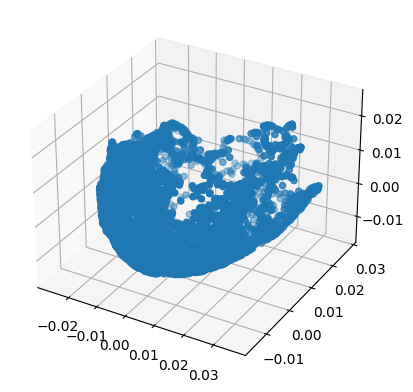

In [5]:
#apply 3d phate clustering
phate_operator = phate.PHATE()
phate_operator.set_params(n_components=3)


#apply phate to signals
phate_signals = phate_operator.fit_transform(signals)

#save phate results
np.savetxt("E:/das/2021-11-30_Medidas/phate_signals.csv", phate_signals, delimiter=",")

#plot phate results
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(phate_signals[:,0], phate_signals[:,1], phate_signals[:,2])
plt.show()



In [6]:
#from vids make a set
vidset = set(vids)
#assign un hex color to each vid
import random
vid_colors = {vid: "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for vid in vidset}

#reassign colors to vids
colors = [vid_colors[vid] for vid in vids]


In [7]:
#concatenate colors to phate_signals
phate_signals_colors = np.concatenate((phate_signals, np.array(colors).reshape(-1,1)), axis=1)
#save phate results with colors
np.savetxt("E:/das/2021-11-30_Medidas/phate_signals_colors.csv", phate_signals_colors, delimiter=",",  fmt="%s")





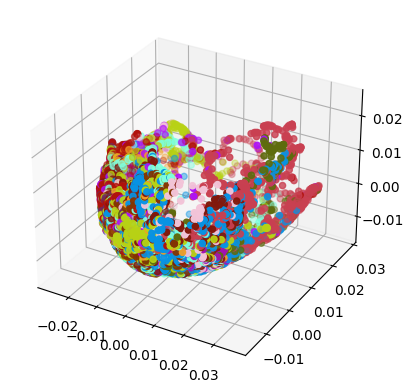

In [8]:
#plot 3d phate results with colors
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(phate_signals[:,0], phate_signals[:,1], phate_signals[:,2], c=colors)
plt.show()



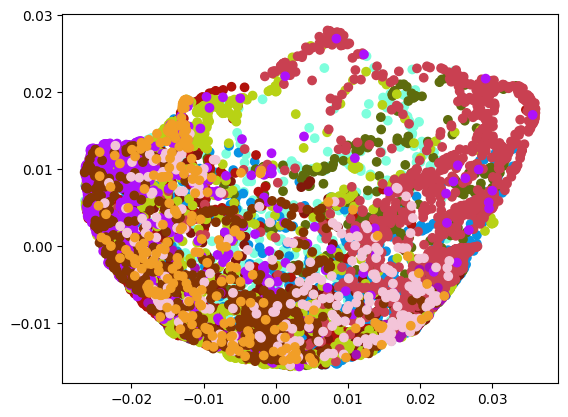

In [12]:
#plot signals in 2d
plt.scatter(phate_signals[:,0], phate_signals[:,1], c=colors)
plt.show()


